In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

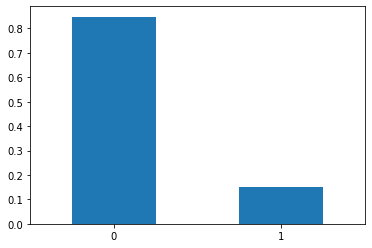

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [2]:
df = pd.read_csv('US_Heart_Patients.csv')

df.head()

df.shape

df['TenYearCHD'].value_counts()

df['TenYearCHD'].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

df.info()

df['glucose'].value_counts()

df.isnull().sum()

df = df.fillna(method = 'ffill')

In [3]:
y = df["TenYearCHD"]
X = df.drop("TenYearCHD",axis = 1)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier(max_depth=3,min_samples_split=10)
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

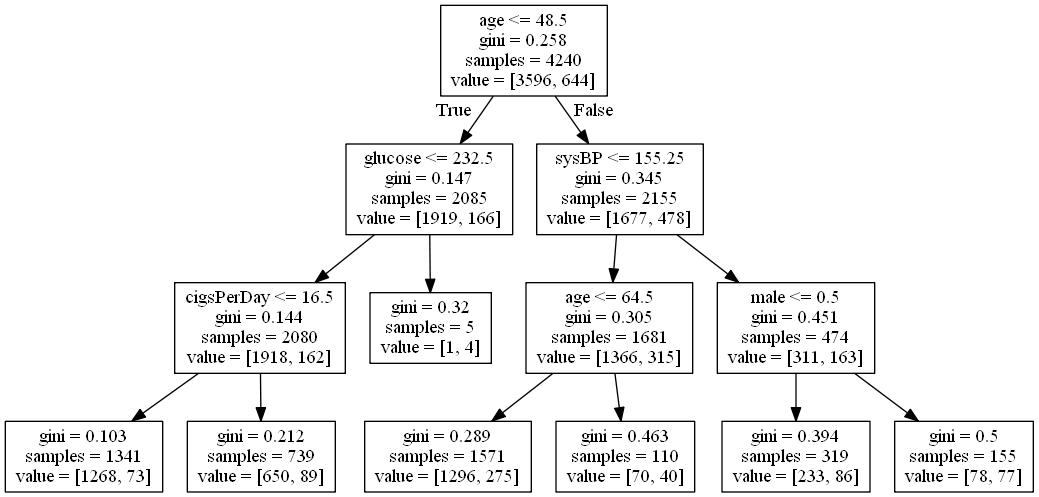

In [8]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [9]:
#Decision tree for prediction

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]
y_train_pred = dtc.predict(X_train)

print("Accuracy:",accuracy_score(y_train,y_train_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_train,y_train_pred))

Accuracy: 1.0
Confusion matrix on train:
[[2511    0]
 [   0  457]]


In [17]:
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

AUC of train: 1.0


In [18]:
y_test_prob = dtc.predict_proba(X_test)[:,1]
y_test_pred = dtc.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_test_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_test,y_test_pred))

Accuracy: 0.7727987421383647
Confusion matrix on train:
[[935 150]
 [139  48]]


In [20]:
print("AUC of test:",roc_auc_score(y_test,y_test_prob))

AUC of test: 0.5592178220261712


In [21]:
#Hyperparameter Tuning

In [22]:
#Gridsearch

In [23]:
#we noticed that decision tree is overfitting(high accuracy on train,very low accuracy on test).
#we will tune the tree to get the best result on both train and test

In [29]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [24]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [25]:
dtc = DecisionTreeClassifier()

In [26]:
max_depth = [2,3,4,5,6,7,8]
min_samples_split = [2,3,4,5,6,7,8,9,10]

In [40]:
min_samples_leaf = [6,7,8,9,10,11,12,13,14,15]

In [41]:
criteria = ['gini','entropy']

In [42]:
params = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
             'criterion':criteria}

gsearch = GridSearchCV(dtc,param_grid = params,scoring = 'roc_auc',cv=3,n_jobs=-1)

In [43]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [44]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 14,
 'min_samples_split': 2}

In [47]:
pd.DataFrame(gsearch.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007313,0.000471,0.003657,4.701907e-04,gini,2,6,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657152,0.638361,0.663181,0.652898,0.01057,837
1,0.007650,0.000471,0.002658,4.730003e-04,gini,2,6,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657152,0.638361,0.663181,0.652898,0.01057,837
2,0.005647,0.000472,0.002328,4.701351e-04,gini,2,6,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657152,0.638361,0.663181,0.652898,0.01057,837
3,0.005320,0.000940,0.002991,8.104673e-07,gini,2,6,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657152,0.638361,0.663181,0.652898,0.01057,837
4,0.006649,0.000472,0.002327,4.711456e-04,gini,2,6,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657152,0.638361,0.663181,0.652898,0.01057,837


In [48]:
dtc = DecisionTreeClassifier(**gsearch.best_params_)

In [49]:

dtc.fit(X_train,y_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]
y_train_pred = dtc.predict(X_train)

print("Accuracy:",accuracy_score(y_train,y_train_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_train,y_train_pred))

Accuracy: 0.8530997304582211
Confusion matrix on train:
[[2460   51]
 [ 385   72]]


In [50]:
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

AUC of train: 0.7195320894410328


In [52]:
y_test_prob = dtc.predict_proba(X_test)[:,1]
y_test_pred = dtc.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_test_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_test,y_test_pred))

Accuracy: 0.8419811320754716
Confusion matrix on train:
[[1053   32]
 [ 169   18]]


In [53]:
print("AUC of test:",roc_auc_score(y_test,y_test_prob))

AUC of train: 0.7040661425860666


In [54]:
# Randomized search

In [55]:
from scipy.stats import randint as sp_randint

In [66]:
dtc = DecisionTreeClassifier()

params = {'max_depth':sp_randint(2,20),'min_samples_split':sp_randint(2,100),
         'min_samples_leaf':sp_randint(1,100),
         'criterion':['gini','entropy']
         }

In [67]:
rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter = 200,scoring = "roc_auc",cv = 3,n_jobs=-1)

In [68]:
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [69]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 90,
 'min_samples_split': 50}

In [70]:
pd.DataFrame(rsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020830,0.007364,0.005207,0.007364,gini,5,60,35,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.682914,0.667414,0.699895,0.683408,0.013265,7
1,0.041656,0.007365,0.005208,0.007365,gini,9,5,4,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.659689,0.637393,0.598261,0.631781,0.025390,191
2,0.020830,0.007366,0.010416,0.007365,gini,19,99,29,"{'criterion': 'gini', 'max_depth': 19, 'min_sa...",0.662608,0.671761,0.674941,0.669770,0.005228,74
3,0.020827,0.007364,0.010413,0.007363,gini,7,84,91,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.663227,0.670284,0.696114,0.676542,0.014136,31
4,0.036448,0.007362,0.010415,0.007364,entropy,19,19,74,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.635574,0.640257,0.624046,0.633292,0.006812,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.014298,0.000475,0.003655,0.000475,gini,8,74,83,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.652460,0.671344,0.675721,0.666509,0.010093,91
196,0.012966,0.001411,0.003656,0.000940,gini,12,76,41,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.649568,0.662938,0.676420,0.662975,0.010962,108
197,0.023273,0.003390,0.003656,0.000471,gini,17,7,4,"{'criterion': 'gini', 'max_depth': 17, 'min_sa...",0.608722,0.609799,0.579879,0.599467,0.013858,200
198,0.014295,0.001245,0.003657,0.000471,gini,18,48,5,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.670652,0.657696,0.645982,0.658110,0.010076,124


In [71]:
dtc = DecisionTreeClassifier(**rsearch.best_params_)

In [77]:

dtc.fit(X_train,y_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]
y_train_pred = dtc.predict(X_train)

print("Accuracy:",accuracy_score(y_train,y_train_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_train,y_train_pred))

Accuracy: 0.8460242587601078
Confusion matrix on train:
[[2511    0]
 [ 457    0]]


In [74]:
print("AUC of train:",roc_auc_score(y_train,y_train_prob))

AUC of train: 0.7046004146307668


In [75]:
y_test_prob = dtc.predict_proba(X_test)[:,1]
y_test_pred = dtc.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_test_pred))
print("Confusion matrix on train:")
print(confusion_matrix(y_test,y_test_pred))

Accuracy: 0.8529874213836478
Confusion matrix on train:
[[1085    0]
 [ 187    0]]


In [78]:
print("AUC of test:",roc_auc_score(y_test,y_test_prob))

AUC of test: 0.7067497966928707
